In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
import torch
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

In [5]:
# Set random seeds for reproducibility
torch.manual_seed(42)

In [6]:
df = pd.read_csv('fmnist_small.csv')
df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,9,0,0,0,0,0,0,0,0,0,...,0,7,0,50,205,196,213,165,0,0
1,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,142,142,142,21,0,3,0,0,0,0
3,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,8,0,0,0,0,0,0,0,0,0,...,213,203,174,151,188,10,0,0,0,0


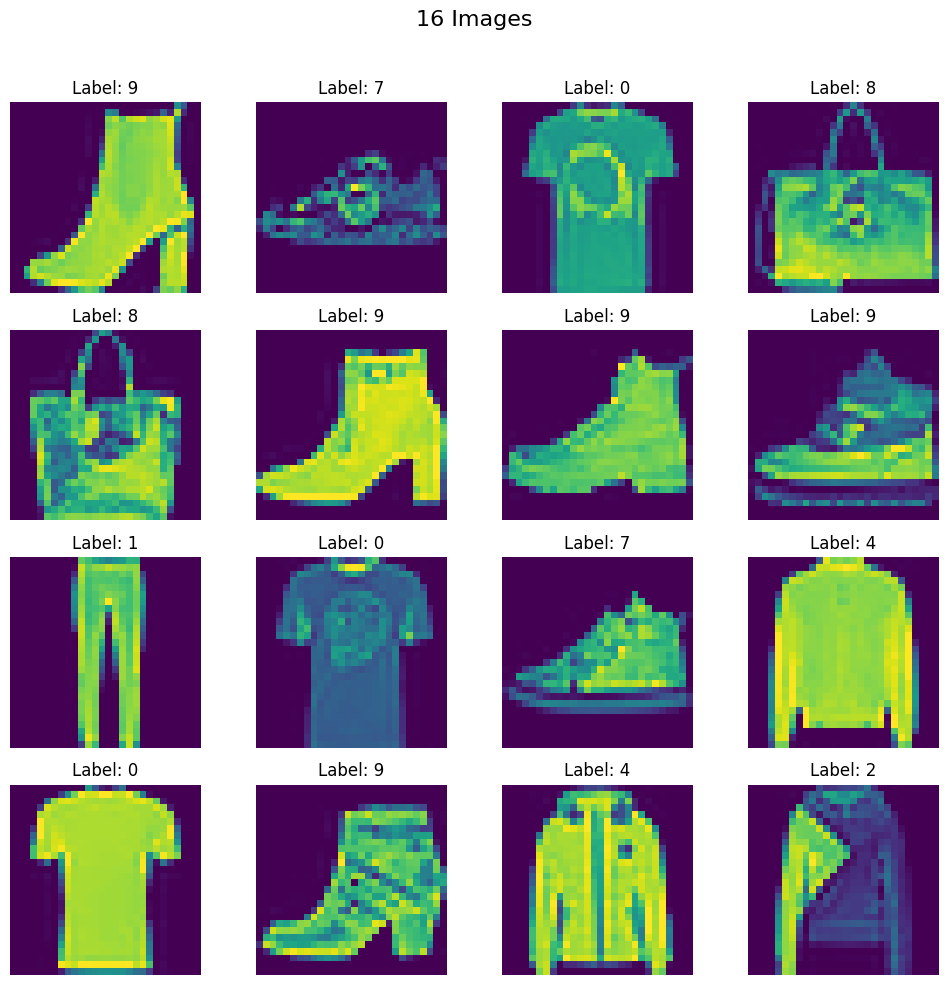

In [7]:
# Create a 4x4 grid of images
fig, axes = plt.subplots(4, 4, figsize=(10, 10))
fig.suptitle("16 Images", fontsize=16)

# Plot the first 16 images from the dataset
for i, ax in enumerate(axes.flat):
    img = df.iloc[i, 1:].values.reshape(28, 28)  # Reshape to 28x28
    ax.imshow(img)  # Display in grayscale
    ax.axis('off')  # Remove axis for a cleaner look
    ax.set_title(f"Label: {df.iloc[i, 0]}")  # Show the label

plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to fit the title
plt.show()


In [8]:
# train test split

X = df.iloc[:, 1:].values
y = df.iloc[:, 0].values

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
# scaling the feautures
X_train = X_train/255.0
X_test = X_test/255.0

In [11]:
# create CustomDataset Class
class CustomDataset(Dataset):

  def __init__(self, features, labels):

    self.features = torch.tensor(features, dtype=torch.float32)
    self.labels = torch.tensor(labels, dtype=torch.long)

  def __len__(self):

    return len(self.features)

  def __getitem__(self, index):

    return self.features[index], self.labels[index]



In [12]:
# create train_dataset object
train_dataset = CustomDataset(X_train, y_train)

In [13]:
# create test_dataset object
test_dataset = CustomDataset(X_test, y_test)

In [14]:
# create train and test loader
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

In [15]:
# define NN class

class MyNN(nn.Module):

  def __init__(self, num_features):

    super().__init__()
    self.model = nn.Sequential(
        nn.Linear(num_features, 128),
        nn.ReLU(),
        nn.Linear(128, 64),
        nn.ReLU(),
        nn.Linear(64, 10)
        # cross entropy will automatically add a softmax layer to teh end so explicit mention is not mandatory 
    )

  def forward(self, x):

    return self.model(x)

In [16]:
# set learning rate and epochs
epochs = 100
learning_rate = 0.1

In [17]:
# instatiate the model
model = MyNN(X_train.shape[1])

# loss function
criterion = nn.CrossEntropyLoss()

# optimizer
optimizer = optim.SGD(model.parameters(), lr= learning_rate)

In [18]:
# training loop

for epoch in range(epochs):

  total_epoch_loss = 0

  for batch_features, batch_labels in train_loader:

    # forward pass
    outputs = model(batch_features)

    # calculate loss
    loss = criterion(outputs, batch_labels)

    # back pass
    optimizer.zero_grad()
    loss.backward()

    # update grads
    optimizer.step()

    total_epoch_loss = total_epoch_loss + loss.item()

  avg_loss = total_epoch_loss/len(train_loader)
  print(f'Epoch: {epoch + 1} , Loss: {avg_loss}')


Epoch: 1 , Loss: 1.3216368528207143
Epoch: 2 , Loss: 0.7793365478515625
Epoch: 3 , Loss: 0.64275246322155
Epoch: 4 , Loss: 0.5751657329003016
Epoch: 5 , Loss: 0.5281801861524582
Epoch: 6 , Loss: 0.4952875079711278
Epoch: 7 , Loss: 0.46024330258369445
Epoch: 8 , Loss: 0.435945899784565
Epoch: 9 , Loss: 0.4182921435435613
Epoch: 10 , Loss: 0.39761732483903567
Epoch: 11 , Loss: 0.3850712249676386
Epoch: 12 , Loss: 0.3714795027176539
Epoch: 13 , Loss: 0.34805427918831505
Epoch: 14 , Loss: 0.3460144503414631
Epoch: 15 , Loss: 0.3146994787454605
Epoch: 16 , Loss: 0.30996329853932064
Epoch: 17 , Loss: 0.29662058234214783
Epoch: 18 , Loss: 0.28524025072654086
Epoch: 19 , Loss: 0.27303538357218105
Epoch: 20 , Loss: 0.2639786763737599
Epoch: 21 , Loss: 0.27316360354423525
Epoch: 22 , Loss: 0.24315999607245128
Epoch: 23 , Loss: 0.23965715132653714
Epoch: 24 , Loss: 0.22243309319019317
Epoch: 25 , Loss: 0.22544379870096842
Epoch: 26 , Loss: 0.21352273071805636
Epoch: 27 , Loss: 0.21874062043925127

In [19]:
# evaluation code
total = 0
correct = 0

with torch.no_grad():

  for batch_features, batch_labels in test_loader:

    outputs = model(batch_features)

    _, predicted = torch.max(outputs, 1)

    total = total + batch_labels.shape[0]

    correct = correct + (predicted == batch_labels).sum().item()

print(correct/total)


0.8325


**lets evaluate our model on train Data**

In [20]:
# evaluation code
total = 0
correct = 0

with torch.no_grad():

  for batch_features, batch_labels in train_loader:

    outputs = model(batch_features)

    _, predicted = torch.max(outputs, 1)

    total = total + batch_labels.shape[0]

    correct = correct + (predicted == batch_labels).sum().item()

print(correct/total)


0.9989583333333333


**tets acc is 83 and train acc is 99.89 hence the model has overfit**


**that is why it is mandatory to use some regularization when dealing with high capacity models like deep learning**

1) dropout
2) batch norm 
3) l2

we are gonna try out these three

In [ ]:
class MyNN(nn.Module):
    def __init__(self, num_features):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(num_features, 128),
            nn.BatchNorm1d(128),
            nn.ReLU(),
            nn.Dropout(p=0.3),
            nn.Linear(128, 64),
            nn.BatchNorm1d(64),
            nn.ReLU(),
            nn.Dropout(p=0.3),
            nn.Linear(64, 10)
        )

    def forward(self, x):
        return self.model(x)

In [22]:
learning_rate = 0.01
epochs = 100

In [23]:
model = MyNN(X_train.shape[1])

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.1, weight_decay=1e-4) # l2 is indirectly applied here

In [24]:
# training loop

for epoch in range(epochs):

  total_epoch_loss = 0

  for batch_features, batch_labels in train_loader:

    # forward pass
    outputs = model(batch_features)

    # calculate loss
    loss = criterion(outputs, batch_labels)

    # back pass
    optimizer.zero_grad()
    loss.backward()

    # update grads
    optimizer.step()

    total_epoch_loss = total_epoch_loss + loss.item()

  avg_loss = total_epoch_loss/len(train_loader)
  print(f'Epoch: {epoch + 1} , Loss: {avg_loss}')


Epoch: 1 , Loss: 0.9761038005352021
Epoch: 2 , Loss: 0.6806729376316071
Epoch: 3 , Loss: 0.6251714714368184
Epoch: 4 , Loss: 0.5788928101460139
Epoch: 5 , Loss: 0.5373692939678828
Epoch: 6 , Loss: 0.5223883171876271
Epoch: 7 , Loss: 0.48301156560579933
Epoch: 8 , Loss: 0.44714458217223485
Epoch: 9 , Loss: 0.4475676720341047
Epoch: 10 , Loss: 0.44086040745178856
Epoch: 11 , Loss: 0.4177042768398921
Epoch: 12 , Loss: 0.40678563048442207
Epoch: 13 , Loss: 0.39974295715490976
Epoch: 14 , Loss: 0.3766692626476288
Epoch: 15 , Loss: 0.36115678653121
Epoch: 16 , Loss: 0.3579924473166466
Epoch: 17 , Loss: 0.35078385134538015
Epoch: 18 , Loss: 0.34394975036382675
Epoch: 19 , Loss: 0.3197352044284344
Epoch: 20 , Loss: 0.3264927775164445
Epoch: 21 , Loss: 0.31595240766803423
Epoch: 22 , Loss: 0.3178883604208628
Epoch: 23 , Loss: 0.2973930670320988
Epoch: 24 , Loss: 0.30664375399549804
Epoch: 25 , Loss: 0.2756978899737199
Epoch: 26 , Loss: 0.26788108646869657
Epoch: 27 , Loss: 0.2726065547267596
Ep

In [25]:
model.eval()

MyNN(
  (model): Sequential(
    (0): Linear(in_features=784, out_features=128, bias=True)
    (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Dropout(p=0.3, inplace=False)
    (4): Linear(in_features=128, out_features=64, bias=True)
    (5): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): ReLU()
    (7): Dropout(p=0.3, inplace=False)
    (8): Linear(in_features=64, out_features=10, bias=True)
  )
)

In [26]:
# evaluation on test data
total = 0
correct = 0

with torch.no_grad():

  for batch_features, batch_labels in test_loader:


    outputs = model(batch_features)

    _, predicted = torch.max(outputs, 1)

    total = total + batch_labels.shape[0]

    correct = correct + (predicted == batch_labels).sum().item()

print(correct/total)

0.8441666666666666


In [27]:
# evaluation on training data
total = 0
correct = 0

with torch.no_grad():

  for batch_features, batch_labels in train_loader:

    outputs = model(batch_features)

    _, predicted = torch.max(outputs, 1)

    total = total + batch_labels.shape[0]

    correct = correct + (predicted == batch_labels).sum().item()

print(correct/total)

0.9960416666666667


**we have improved from 17(100,83) to 13(96,83) diffrence betwenn train and test so the model is better generalised now**

 

**Now its time for hyperparameter tuning to improve the test score**

In [35]:
class MyNN_(nn.Module):

  def __init__(self, input_dim, output_dim, num_hidden_layers, neurons_per_layer, dropout_rate):

    super().__init__()

    layers = []

    for i in range(num_hidden_layers):

      layers.append(nn.Linear(input_dim, neurons_per_layer))
      layers.append(nn.BatchNorm1d(neurons_per_layer))
      layers.append(nn.ReLU())
      layers.append(nn.Dropout(dropout_rate))
      input_dim = neurons_per_layer

    layers.append(nn.Linear(neurons_per_layer, output_dim))

    self.model = nn.Sequential(*layers)

  def forward(self, x):

    return self.model(x)

In [36]:
# objective function
def objective(trial):

  # next hyperparameter values from the search space
  num_hidden_layers = trial.suggest_int("num_hidden_layers", 1, 5)
  neurons_per_layer = trial.suggest_int("neurons_per_layer", 8, 128, step=8)
  epochs = trial.suggest_int("epochs", 10, 50, step=10)
  learning_rate = trial.suggest_float("learning_rate", 1e-5, 1e-1, log=True)
  dropout_rate = trial.suggest_float("dropout_rate", 0.1, 0.5, step=0.1)
  batch_size = trial.suggest_categorical("batch_size", [16, 32, 64, 128])
  optimizer_name = trial.suggest_categorical("optimizer", ['Adam', 'SGD', 'RMSprop'])
  weight_decay = trial.suggest_float("weight_decay", 1e-5, 1e-3, log=True)

  train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, pin_memory=True)
  test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, pin_memory=True)

  # model init
  input_dim = 784
  output_dim = 10

  model = MyNN_(input_dim, output_dim, num_hidden_layers, neurons_per_layer, dropout_rate)

  # optimizer selection
  criterion = nn.CrossEntropyLoss()
  optimizer = optim.SGD(model.parameters(), lr=0.1, weight_decay=1e-4)

  if optimizer_name == 'Adam':
    optim.Adam(model.parameters(), lr=learning_rate, weight_decay=weight_decay)
  elif optimizer_name == 'SGD':
    optim.SGD(model.parameters(), lr=learning_rate, weight_decay=weight_decay)
  else:
    optim.RMSprop(model.parameters(), lr=learning_rate, weight_decay=weight_decay)

  # training loop

  for epoch in range(epochs):

    for batch_features, batch_labels in train_loader:

      # forward pass
      outputs = model(batch_features)

      # calculate loss
      loss = criterion(outputs, batch_labels)

      # back pass
      optimizer.zero_grad()
      loss.backward()

      # update grads
      optimizer.step()


  # evaluation
  model.eval()
  # evaluation on test data
  total = 0
  correct = 0

  with torch.no_grad():

    for batch_features, batch_labels in test_loader:

      outputs = model(batch_features)

      _, predicted = torch.max(outputs, 1)

      total = total + batch_labels.shape[0]

      correct = correct + (predicted == batch_labels).sum().item()

    accuracy = correct/total

  return accuracy

In [37]:
import optuna

study = optuna.create_study(direction='maximize')

[I 2025-06-09 14:59:47,264] A new study created in memory with name: no-name-78e19ed9-7a76-4f94-99d7-7e1b4acd7ce8


In [38]:
study.optimize(objective, n_trials=10)

[I 2025-06-09 15:00:12,100] Trial 0 finished with value: 0.435 and parameters: {'num_hidden_layers': 5, 'neurons_per_layer': 24, 'epochs': 30, 'learning_rate': 0.0031298905226983657, 'dropout_rate': 0.5, 'batch_size': 32, 'optimizer': 'Adam', 'weight_decay': 0.000261754358493072}. Best is trial 0 with value: 0.435.
[I 2025-06-09 15:01:05,786] Trial 1 finished with value: 0.5816666666666667 and parameters: {'num_hidden_layers': 5, 'neurons_per_layer': 40, 'epochs': 50, 'learning_rate': 2.6882306877093362e-05, 'dropout_rate': 0.5, 'batch_size': 16, 'optimizer': 'RMSprop', 'weight_decay': 1.1819265115047513e-05}. Best is trial 1 with value: 0.5816666666666667.
[I 2025-06-09 15:02:14,690] Trial 2 finished with value: 0.8375 and parameters: {'num_hidden_layers': 4, 'neurons_per_layer': 112, 'epochs': 30, 'learning_rate': 0.021875631976798322, 'dropout_rate': 0.30000000000000004, 'batch_size': 32, 'optimizer': 'RMSprop', 'weight_decay': 8.523633840947248e-05}. Best is trial 2 with value: 0.8

In [39]:
study.best_value

0.84

In [40]:
study.best_params

{'num_hidden_layers': 4,
 'neurons_per_layer': 48,
 'epochs': 40,
 'learning_rate': 0.003259163954675859,
 'dropout_rate': 0.1,
 'batch_size': 16,
 'optimizer': 'Adam',
 'weight_decay': 2.352891746396998e-05}

In [41]:
# this shows that deep learning networks alone cant perform better than this, and that motivates the need of CNN ARCHITECTURES

In [44]:
# ofc when the entire 60000 images of the data set is used , accuracy went as high as 90 percent 

In [43]:
# if more accuracy is required, it is suggested to shift to a CNN